# Nuages de mots

## Imports et stopwords

In [1]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to /home/boy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [3]:
# Choisir une année
year = 1970

In [4]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
len(txts)

100

In [5]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [6]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

100

In [7]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][0:200]

'LE som DIMANCHE 6 ET LUNDI 7 SEPTEMBRE 1970 INFORMATIONS GÉNÉRALES Au cours do la nuit de mardi Rixs fratricide à Neerpede # Un facteur des postes, en effectuant sa tournée samedi midi, a découvert le'

In [9]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [10]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

"LE som DIMANCHE 6 ET LUNDI 7 SEPTEMBRE 1970 INFORMATIONS GÉNÉRALES Au cours do la nuit de mardi Rixs fratricide à Neerpede # Un facteur des postes, en effectuant sa tournée samedi midi, a découvert le drame # Dans la soirée le meurtrier François Schoonjans était arrêté près d'Alost Samedi, peu avant midi, un meurtre a été découvert à Neerpede, un hameau d’Anderlecht. Quelques heures plus tard, le mèurtrler était arreté aux environs d’Alost. 11 s’agissait du frère cadet de la victime. Albert Scho"

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [11]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [12]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1970_clean.txt!'

In [13]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'SOM DIMANCHE LUNDI SEPTEMBRE INFORMATIONS GÉNÉRALES COURS NUIT MARDI RIXS FRATRICIDE NEERPEDE FACTEUR POSTES EFFECTUANT TOURNÉE SAMEDI MIDI DÉCOUVERT DRAME SOIRÉE MEURTRIER FRANÇOIS SCHOONJANS ARRÊTÉ PRÈS ALOST SAMEDI PEU AVANT MIDI MEURTRE DÉCOUVERT NEERPEDE HAMEAU ANDERLECHT QUELQUES HEURES TARD MÈURTRLER ARRETÉ ENVIRONS ALOST AGISSAIT FRÈRE CADET VICTIME ALBERT SCHOONJANS ANS FRÈRE FRANÇOIS ANS CÉLIBATAIRES VIVAIENT MAISON LEURS PARENTS RUE VIGNE ANDERLECHT PRÈS BOULEVARD GRANDE CEINTURE VÉRI'

## Nuage de mots

### Afficher les termes les plus fréquents


In [14]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('TÉL', 1560), ('BRUXELLES', 1181), ('RUE', 1015), ('ANS', 650), ('TRÈS', 492), ('PRIX', 462), ('PART', 441), ('APP', 428), ('HEURES', 411), ('SOIR', 394)]


### Créer, stocker et afficher le nuage de mots

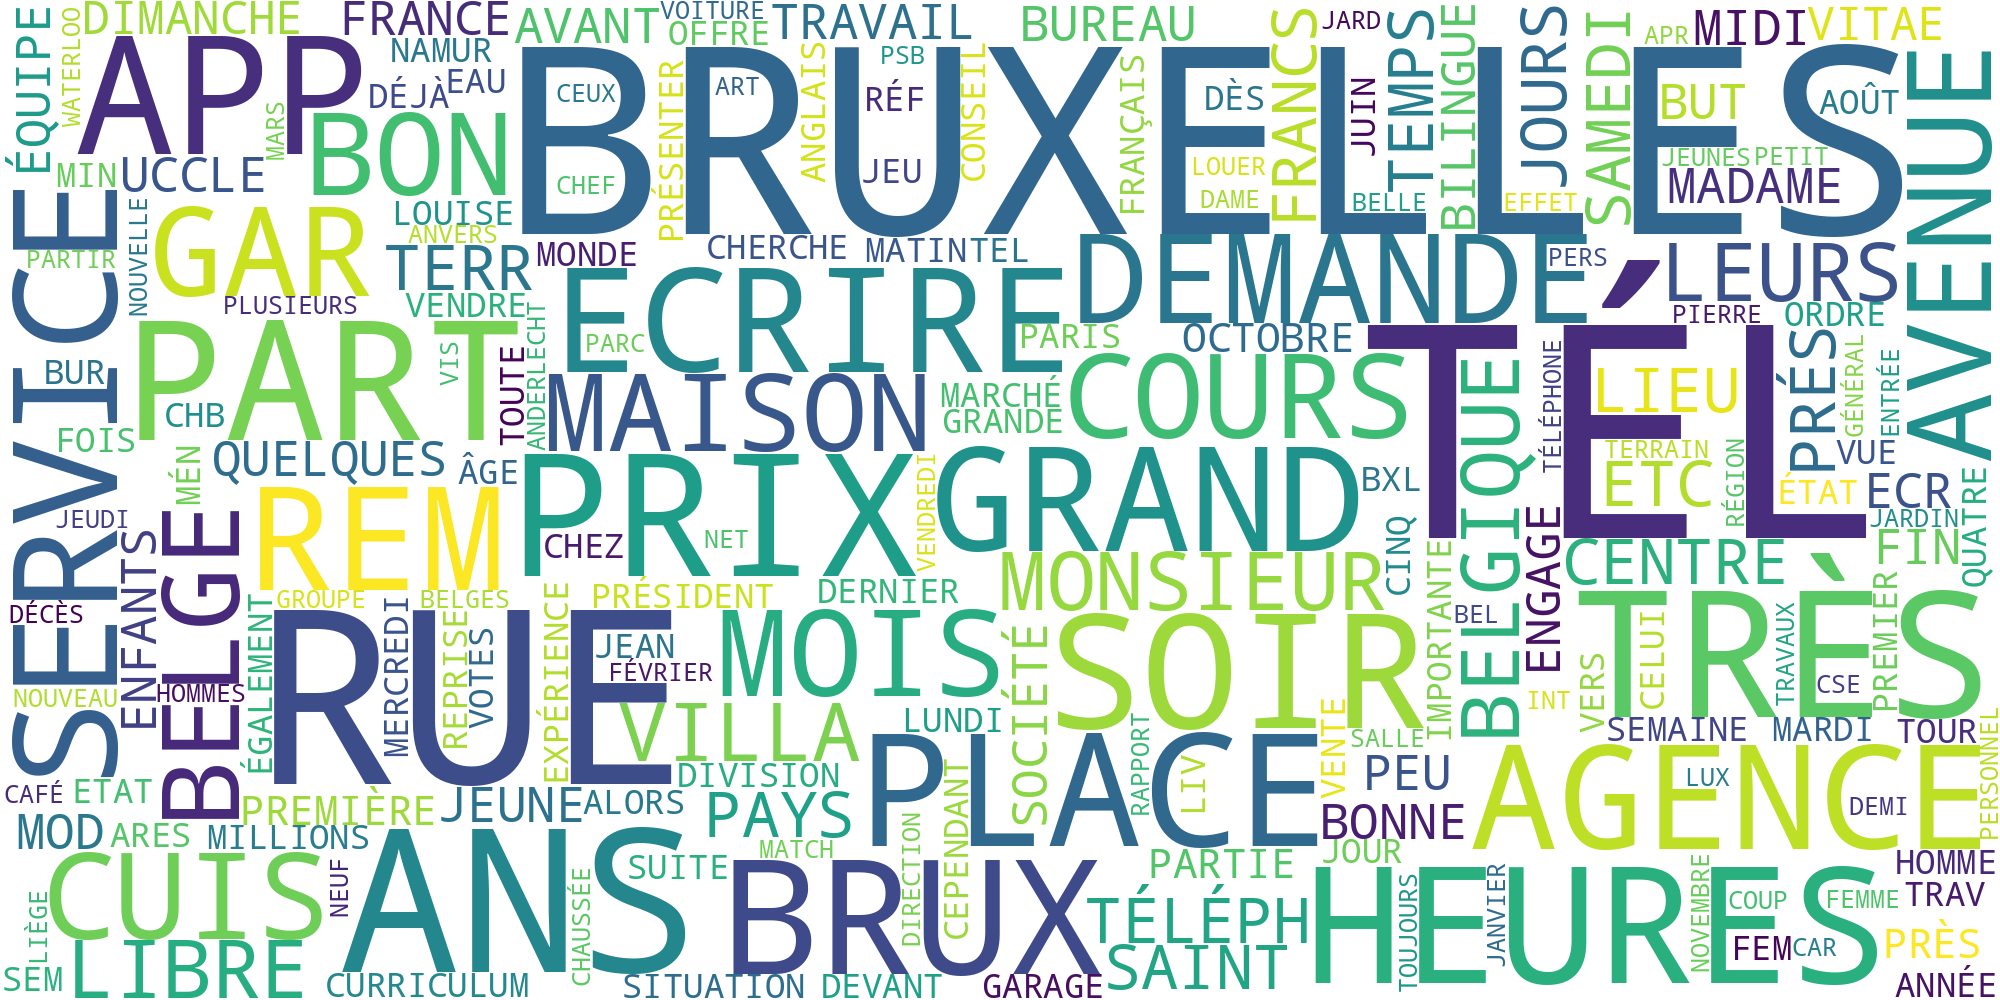

In [15]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))